Original column names:
Index(['customer_id', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')
Cleaned column names:
Index(['customer_id', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')

Missing values in each column:
customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64


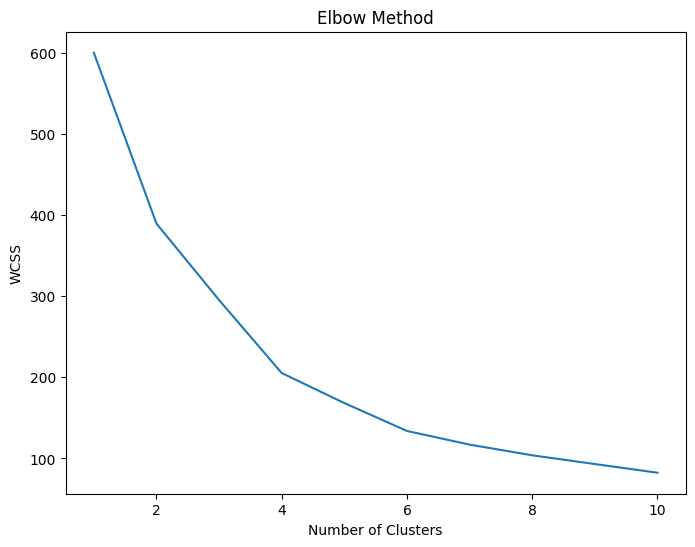

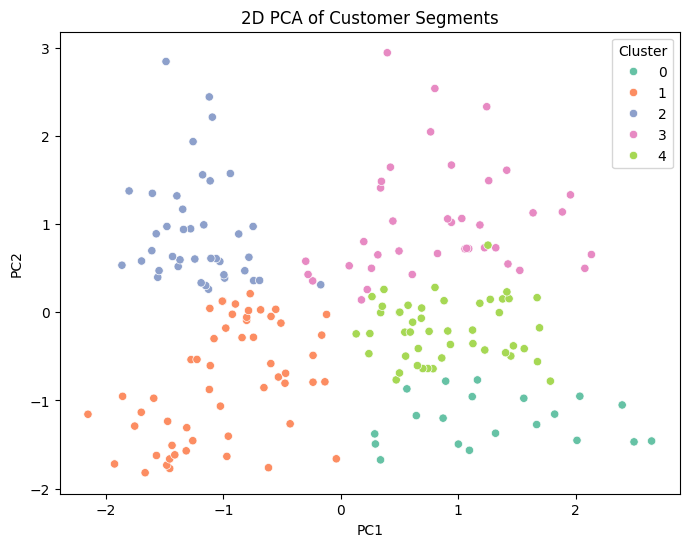

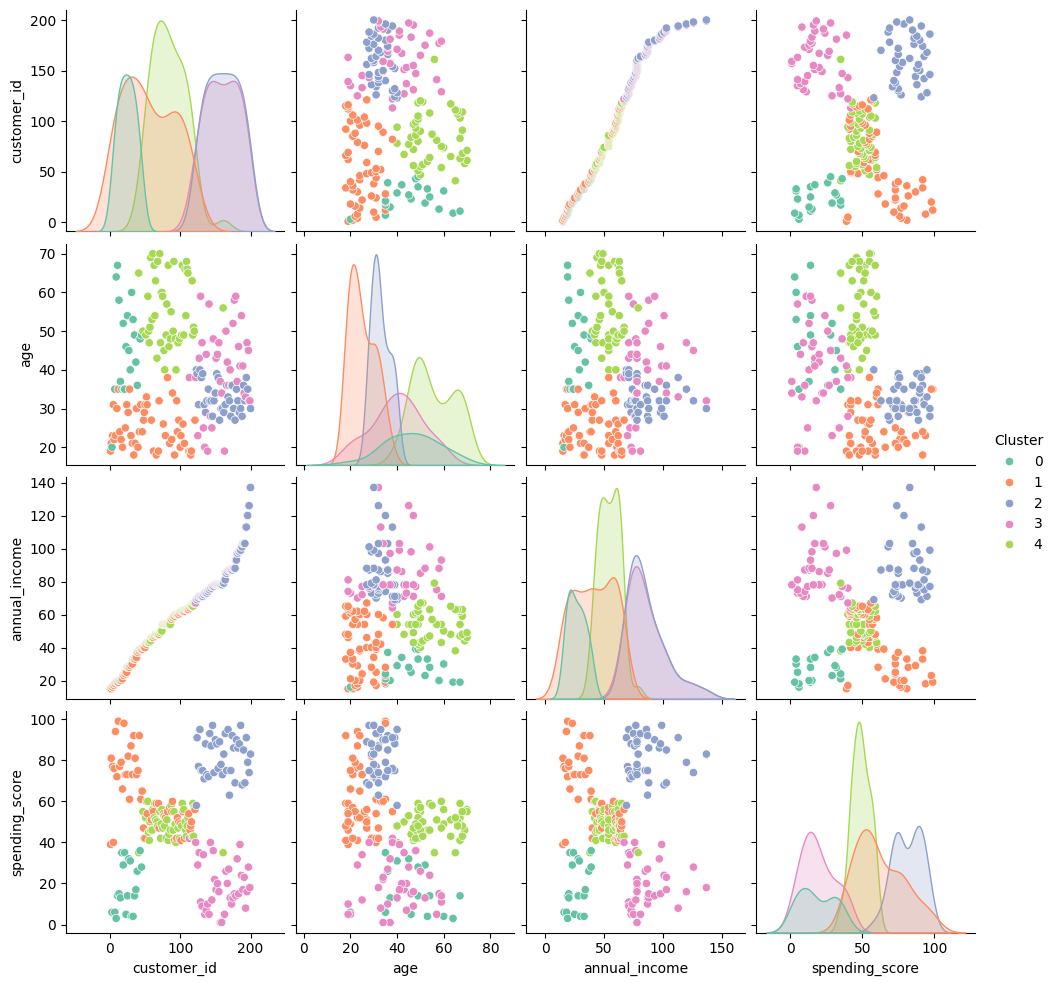

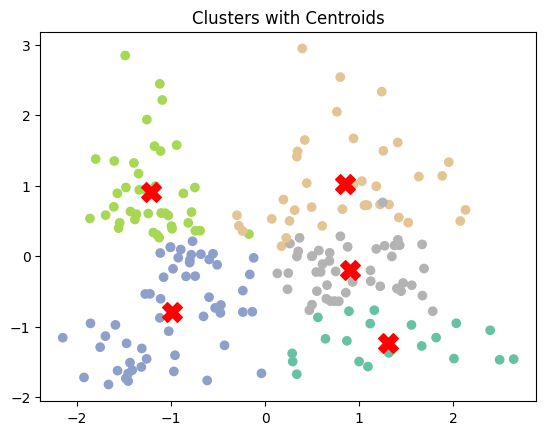


Cluster 0 Summary:
       customer_id        age  annual_income  spending_score  Cluster
count    20.000000  20.000000      20.000000       20.000000     20.0
mean     24.100000  46.250000      26.750000       18.350000      0.0
std      12.336936  11.579815       7.311671       11.935242      0.0
min       3.000000  20.000000      16.000000        3.000000      0.0
25%      14.500000  36.750000      20.000000        6.000000      0.0
50%      24.000000  47.000000      26.500000       14.500000      0.0
75%      33.500000  53.250000      33.000000       29.500000      0.0
max      45.000000  67.000000      39.000000       36.000000      0.0

Cluster 1 Summary:
       customer_id        age  annual_income  spending_score  Cluster
count    54.000000  54.000000      54.000000       54.000000     54.0
mean     55.648148  25.185185      41.092593       62.240741      1.0
std      36.656054   5.508395      16.815613       16.596130      0.0
min       1.000000  18.000000      15.000000      

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Step 1: Load the Dataset
df = pd.read_csv(r'C:\Users\dell\Downloads\customer_data.csv.csv')

# Step 1.1: Inspect the column names to ensure they match exactly
print("Original column names:")
print(df.columns)

# Step 1.2: Clean column names to remove any leading or trailing spaces
df.columns = df.columns.str.strip()

# Step 1.3: Re-check the cleaned column names
print("Cleaned column names:")
print(df.columns)

# Step 2: Data Preprocessing
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Drop any rows with missing values (or handle them as necessary)
df.dropna(inplace=True)

# Standardize the features (age, annual_income, spending_score)
# Ensure these columns exist in the dataset
if 'age' in df.columns and 'annual_income' in df.columns and 'spending_score' in df.columns:
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[['age', 'annual_income', 'spending_score']])
else:
    raise KeyError("One or more required columns are missing!")

# Step 3: Clustering

# Elbow Method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow Method, assume the optimal number of clusters is 5 (adjust as necessary)
optimal_k = 5

# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Step 4: Visualization

# 1. 2D Scatter Plot using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='Set2')
plt.title('2D PCA of Customer Segments')
plt.show()

# 2. Pair Plot to visualize relationships between features within clusters
sns.pairplot(df, hue='Cluster', palette='Set2')
plt.show()

# 3. Centroid Visualization on 2D PCA Scatter Plot
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='Set2')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.title('Clusters with Centroids')
plt.show()

# Step 5: Save the Clustered Dataset
df.to_csv('clustered_customer_data.csv', index=False)

# Step 6: Insights and Recommendations (Example)
# Example insights based on cluster characteristics (adjust for your actual data)
for i in range(optimal_k):
    print(f"\nCluster {i} Summary:")
    print(df[df['Cluster'] == i].describe())

# Example recommendation based on cluster characteristics:
# High Income, High Spending: Target these customers with premium products or loyalty programs.
# Low Income, High Spending: Offer discounts or tailored promotions.
# Young, Low Spending: Use strategies to increase engagement (e.g., product recommendations or discounts).
